# Multiple Linear Regression

In [74]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!conda update seaborn #-- version =0.9.0
import seaborn as sns
print(sns.__version__)


print("Libraries imported")

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
seaborn                   0.9.0                    py35_0  
0.9.0
Libraries imported


In [75]:
# The code was removed by Watson Studio for sharing.

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Exploratory Data Analysis

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [77]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [78]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [79]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [80]:
df_in = df.iloc[:, :-1]
df_out = df['Profit']

In [81]:
df_in.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [82]:
df_out.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### Data Visualisation

In [83]:
print(sns.__version__)

0.9.0


#### pair plots using seaborn

#### seaborn.PairGrid
`class seaborn.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, height=2.5, aspect=1, despine=True, dropna=True, size=None)`

- Subplot grid for plotting pairwise relationships in a dataset.

- This class maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

- It can also represent an additional level of conditionalization with the hue parameter, which plots different subets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.

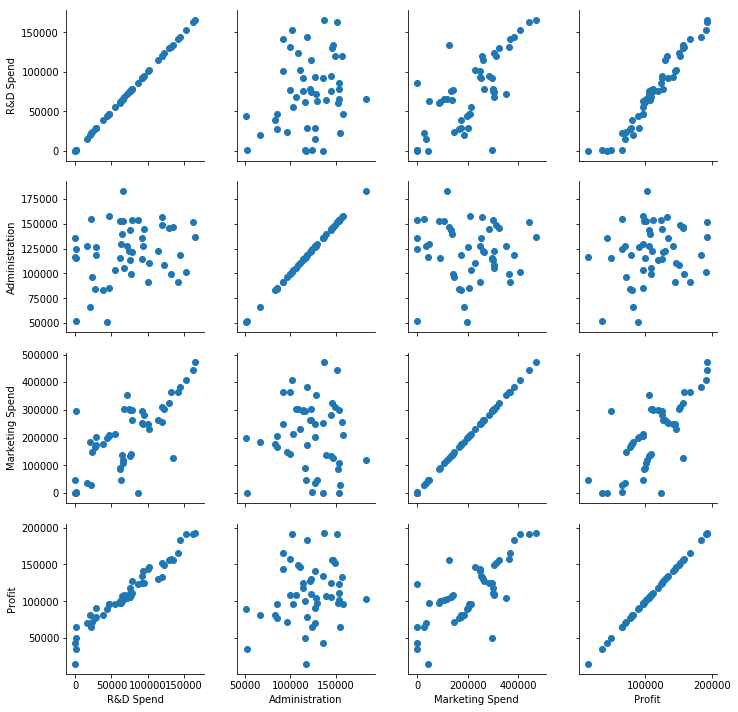

In [84]:
# relational plots
g= sns.PairGrid(df)
g= g.map(plt.scatter)

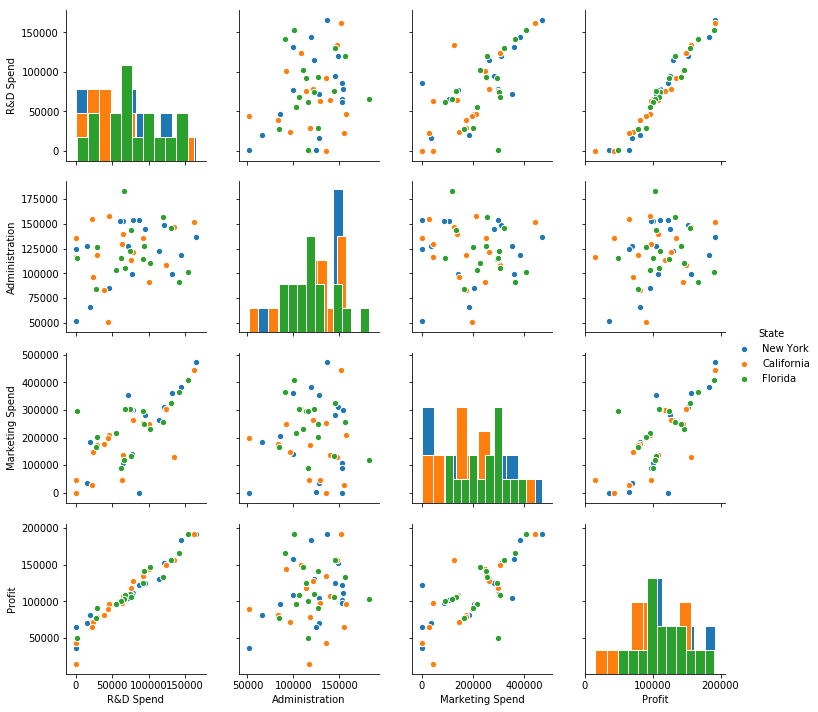

In [85]:
g= sns.PairGrid(df,hue="State")
g.map_diag(plt.hist,edgecolor="w")
g.map_offdiag(plt.scatter,edgecolor="w",s=40)
g.add_legend()

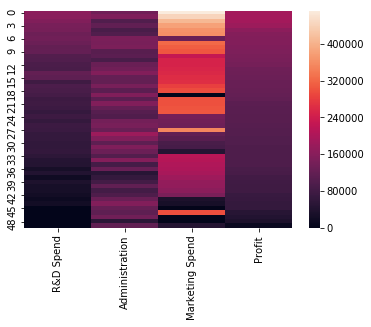

In [86]:
#heat map 
sns.heatmap(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])

In [87]:
corr = df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


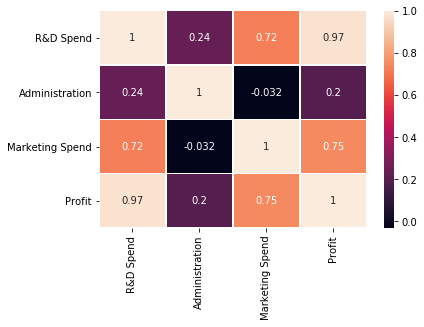

In [88]:
sns.heatmap(corr,annot=True,linewidth=0.5)

### Data Preprocessing

In [102]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,4].values

In [103]:
X[:,3]

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'], dtype=object)

In [104]:
# OneHotEncoding the catogerical Variables
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_enc = LabelEncoder()
X[:,3] = label_enc.fit_transform(X[:,3])

enc = OneHotEncoder(categorical_features=[3])
X = enc.fit_transform(X).toarray()

In [105]:
X.shape

(50, 6)

In [108]:
X[:2,:]

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05]])

In [109]:
# Avoiding Dummy variable trap
X = X[:,1:]

### Modelling 

In [143]:
# split the DataSets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [144]:
X_train[1]

array([  0.00000000e+00,   1.00000000e+00,   4.60140200e+04,
         8.50474400e+04,   2.05517640e+05])

In [145]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
y_pred = regressor.predict(X_test)
y_pred

array([ 103015.20159796,  132582.27760815,  132447.73845175,
         71976.09851258,  178537.48221056,  116161.24230166,
         67851.69209676,   98791.73374687,  113969.43533013,
        167921.06569551])

In [147]:
regressor.coef_

array([ -9.59284160e+02,   6.99369053e+02,   7.73467193e-01,
         3.28845975e-02,   3.66100259e-02])

In [148]:
regressor.intercept_

42554.167617724379

In [149]:
coeff = pd.DataFrame(index = ['one','two','R&D Spend', 'Administration', 'Marketing Spend',], columns=['Coefficients'], data =  list(regressor.coef_))

In [150]:
coeff

,Coefficients
one,-959.284160
two,699.369053
R&D Spend,0.773467
Administration,0.032885
Marketing Spend,0.036610


### Metrics

In [151]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 7514.29365964
Mean Squared Error: 83502864.0326
Root Mean Squared Error: 9137.99015279
